<a href="https://colab.research.google.com/github/sohyunwriter/ai-tech-archive/blob/master/pandas_apply_lambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## lambda 식으로 데이터 가공      
Assembled by Sohyeon Yim (2020-06-23)      
   
-정의 : 익명 함수로, 간결한 함수형 프로그래밍 지원   

-장점   
1) **코드의 간결성** - 람다식을 사용하면 불필요한 루프문 삭제 가능   
2) 필요한 정보만을 사용하는 방식을 통한 **메모리상의 효율성, 불필요한 연산 배제 가능**   

-단점   
1) 어떤 방법으로 작성해도 모든 원소를 전부 순회하는 경우 람다식이 단순 반복문보다 느리다. **최종 출력되는 bytecode나 어셈블리 코드는 더 길다.**   
2) 디버깅 시 **함수 콜스택 추적이 어렵다.**   
3) 람다식을 남용하면 오히려 **코드를 이해하기 어려울 수 있다.**   

#### lambda 식   
(예) lambda x : x ** 2   
: 의 왼쪽에 있는 x는 입력 인자,    
: 의 오른쪽은 입력 인자의 계산식, 호출 시 이 계산 결과를 반환   

In [1]:
# lambda 식을 쓰지 않는 경우
def get_square(a):
  return a**2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


In [3]:
# lambda 식을 쓸 경우
lambda_square = lambda x : x ** 2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


#### lambda 식과 map()   

In [4]:
# 여러 개의 값을 입력 인자로 사용할 경우
a = [1, 2, 3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [11]:
# (예) 문자열 리스트에서 lambda 식을 활용해 양끝 공백 제거하기
b = [' I ', 'love', 'you ', '. ', 'Do    ', 'you    ', '    love', '   me', '?']

In [12]:
cleaned = map(lambda x : x.strip(), b)
list(cleaned)

['I', 'love', 'you', '.', 'Do', 'you', 'love', 'me', '?']

#### pandas 에서 lambda 식 사용하기   

In [26]:
# apply lambda
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()

In [27]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [28]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [35]:
# alcohol을 모두 5도씩 올리기
df['new_alcohol'] = df['alcohol'].apply(lambda x : x + 5)
df[['alcohol', 'new_alcohol']].head()

,alcohol,new_alcohol
0,14.23,19.23
1,13.20,18.20
2,13.16,18.16
3,14.37,19.37
4,13.24,18.24


#### lambda 식에서 if else 사용하기   
lambda x : 'Child' if x <= 15 else 'Adult'   
:의 왼쪽 값은 입력값   
:의 오른쪽 값은 반환값   
if x <= 15이면 'Child' 반환   
else이면 'Adult' 반환   

In [33]:
# proline이 1000이 넘어가는 경우를 체크하는 컬럼 만들기
df['proline_larger_than_1000'] = df['proline'].apply(lambda x : 1 if x > 1000 else 0) # else일 때 무얼 반환할지를 꼭 만들어야 함
df[['proline', 'proline_larger_than_1000']].head(5)

,proline,proline_larger_than_1000
0,1065.0,1
1,1050.0,1
2,1185.0,1
3,1480.0,1
4,735.0,0


In [39]:
df['alcohol'].max()

14.83

In [40]:
df['alcohol'].min()

11.03

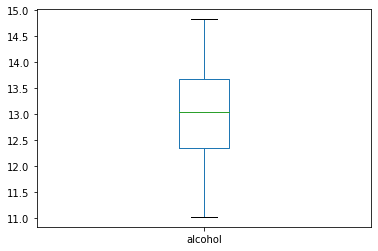

In [47]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df['alcohol'].plot.box()

In [52]:
# alcohol에 따라 세분화된 분류를 수행하는 함수 생성
def get_category(alcohol):
  cat = ''
  if alcohol <= 12.0 : cat = 'alsss'
  elif alcohol <= 13.0 : cat = 'baby'
  elif alcohol <= 14.0 : cat = 'no name'
  else : cat = 'adult'
  return cat

In [53]:
# lambda 식에서 get_categry() 함수를 반환값으로 지정
df['alcohol_cat'] = df['alcohol'].apply(lambda x : get_category(x))
df[['alcohol', 'alcohol_cat']].head()

,alcohol,alcohol_cat
0,14.23,adult
1,13.20,no name
2,13.16,no name
3,14.37,adult
4,13.24,no name


##### 참고문헌 
- 위키북스, "파이썬 머신러닝 가이드"
- 개인 경험   

1) 비정형 데이터에 대해 전처리를 할 때, 단위를 제거하는 등 특정 조작을 가해야할 때 lambda 식을 이용하면 유용하다. 물론 나는 re를 선호하지만 가해야 하는 조작이 많지 않다면 lambda 식을 쓰는 게 나은 것 같다.      
2) 또, pandas를 이용하는 가장 큰 이유는 컬럼에 동일한 연산을 할 때 빠르다는건데, 실제 데이터를 처리하다보면 데이터가 난잡한 경우가 많아서 이러한 pandas의 장점이 쓸모가 없게 되는 경우가 있다. 하지만 그럴 때도 for문 등을 만드는 것보다, 함수를 만들어 apply lambda 식을 이용하는 게 가장 깔끔하고 빠른 듯 싶다.
